# Explorative Data Analysis - Patients

In this notebook you find the explorative data anaylsis for the label data of patients.
There is also diagnostic data of the patients, data of the used MRI machines and for some cases (like external admissions) there ist lab data available.
The aggregations are always limited to one individual patients.


## Imports and Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set default plt figsize to (12,6)
plt.rcParams["figure.figsize"] = (12,6)
pd.set_option('display.colheader_justify', 'center')


In [2]:
# runs the clean and preprocessing notebook
%run "clean_preprocessing.ipynb"

Start Clean and Preprocessing patients-data
End Clean and Preprocessing patient data
Start Clean and Preprocessing mri data
0 Cases were deleted, because they were same-day duplicates.
End Clean and Preprocessing mri data
Start Clean and Preprocessing lab-data
Sparsity of labordata: 0.31 % (nur von Fällen mit Laborwerten)
Von 519 Fällen gibt es keine Laborwerte.
End Clean and Preprocessing labor data


In [3]:
# runs the imputation notebook
%run "imputation.ipynb"

Start Imputation Lab data
189
89
86
Sparsity of lab values in percent is:
Date_Case         0.0
ID_MRI_Machine    0.0
COR60             0.0
FSH               0.0
FT4               0.0
IGF1              0.0
LH                0.0
dtype: float64
End Imputation Lab data


In [4]:
# runs the data_partitioning notebook
%run "data_partitioning.ipynb"

Start Data Partitioning
Total Patients Train set: 210
Total Patients Test set: 53
Label Distribution relative Difference between Train- and Testset:
 ± 0.755 %
Total Dataframe Train rows: 308
Total Dataframe Test rows: 73
Label Distribution relative Difference between Train- and Testset:
 ± 3.665 %
Total Dataframe Fold 1 rows: 62
Total Dataframe Fold 2 rows: 62
Total Dataframe Fold 3 rows: 62
Total Dataframe Fold 4 rows: 61
Total Dataframe Fold 5 rows: 61
Label Distribution relative Difference between Fold 0 vs. Fold 1:
 ± 0.0 %
Label Distribution relative Difference between Fold 0 vs. Fold 2:
 ± 0.032 %
Label Distribution relative Difference between Fold 0 vs. Fold 3:
 ± 0.027 %
Label Distribution relative Difference between Fold 0 vs. Fold 4:
 ± 0.027 %
Label Distribution relative Difference between Fold 1 vs. Fold 2:
 ± 0.032 %
Label Distribution relative Difference between Fold 1 vs. Fold 3:
 ± 0.027 %
Label Distribution relative Difference between Fold 1 vs. Fold 4:
 ± 0.027 %
Lab

In [5]:
# read train data set
df = pd.read_csv(r'../data/train_data.csv')

In [6]:
# make datetime values
df["Date_Case"] = pd.to_datetime(df["Date_Case"])
df["Entry_date"] = pd.to_datetime(df["Entry_date"])
df["Operation_date"] = pd.to_datetime(df["Operation_date"])
# set category data type in pandas, check datatypes
df['ID_MRI_Machine'] = df['ID_MRI_Machine'].astype('category')
df['Adenoma_size'] = df['Adenoma_size'].astype('category')
df['Label_Quality'] = df['Label_Quality'].astype('category')
df['Diagnosis'] = df['Diagnosis'].astype('category')
df['Category'] = df['Category'].astype('category')

## Dataframe Summary

In [7]:
df.head()

,Patient_ID,Category,Case_ID,Date_Case,ID_MRI_Machine,COR60,FSH,FT4,IGF1,LH,...,Pre_OP_hormone_cortico,Pre_OP_hormone_gonado,Pre_OP_hormone_somato,Pre_OP_hormone_thyreo,Pre_OP_hormone_hyperprolaktin,Pre_OP_hormone_keine,Pre_OP_hormone_intakt,Label_Quality,Patient_gender,fold
0,682837,prolaktinom,40771507,2019-09-02 17:33:00,MRI1,500.0,230.00000,101.0,369.0,150.00000,...,0,1,0,0,1,0,0,dd nicht-funktionell,0,4
1,682837,prolaktinom,41337379,2021-10-02 09:09:00,MRI3,500.0,413.00000,111.0,340.0,207.00000,...,0,1,0,0,1,0,0,dd nicht-funktionell,0,3
2,677044,non-prolaktinom,40367289,2018-05-30 18:23:00,MRI1,662.0,16.86101,11.4,43.1,16.86101,...,0,0,0,0,0,1,0,NaN,0,2
3,534824,non-prolaktinom,41481242,2022-03-26 10:03:00,MRI4,500.0,408.00000,136.0,119.0,213.00000,...,1,1,1,1,0,0,0,NaN,0,3
4,534824,non-prolaktinom,41132788,2021-05-27 12:37:00,MRI1,500.0,160.00000,136.0,110.0,160.00000,...,1,1,1,1,0,0,0,NaN,0,0


In [8]:
df.tail()

,Patient_ID,Category,Case_ID,Date_Case,ID_MRI_Machine,COR60,FSH,FT4,IGF1,LH,...,Pre_OP_hormone_cortico,Pre_OP_hormone_gonado,Pre_OP_hormone_somato,Pre_OP_hormone_thyreo,Pre_OP_hormone_hyperprolaktin,Pre_OP_hormone_keine,Pre_OP_hormone_intakt,Label_Quality,Patient_gender,fold
303,374012,non-prolaktinom,41701136,2023-04-06 12:37:00,MRI3,500.0,159.0,166.0,970.0,15.4452,...,1,1,0,0,0,0,0,NaN,0,2
304,443533,non-prolaktinom,40691357,2019-05-28 09:50:00,MRI3,500.0,560.0,254.0,112.0,380.0000,...,1,0,1,1,0,0,0,NaN,0,2
305,443533,non-prolaktinom,41153574,2021-05-06 11:53:00,MRI2,500.0,560.0,254.0,112.0,380.0000,...,1,0,1,1,0,0,0,NaN,0,1
306,114020,non-prolaktinom,40468309,2019-01-08 08:00:00,MRI3,500.0,580.0,162.0,324.0,128.0000,...,0,0,0,0,1,0,0,NaN,0,3
307,114020,non-prolaktinom,41314319,2021-09-30 12:29:00,MRI1,500.0,640.0,169.0,366.0,135.0000,...,0,0,0,0,1,0,0,NaN,0,3


In [9]:
print("Total Dataframe rows:", len(df))
print("Total Dataframe columns:", len(df.columns))

Total Dataframe rows: 308
Total Dataframe columns: 27


## Distribution Analysis
we will take a look at the distributions of the variables and check for outliers as well.

### Data of MRI
First we will take a look at the distribution of the data for the MRI which were done. 

In [10]:
column = 'Date_Case'
print("Range of Case dates:", df[column].min().strftime('%d.%m.%Y'), "to", df[column].max().strftime('%d.%m.%Y'))
print("Missing values:", sum(df[column].isna()))

Range of Case dates: 07.02.2018 to 11.05.2023
Missing values: 0


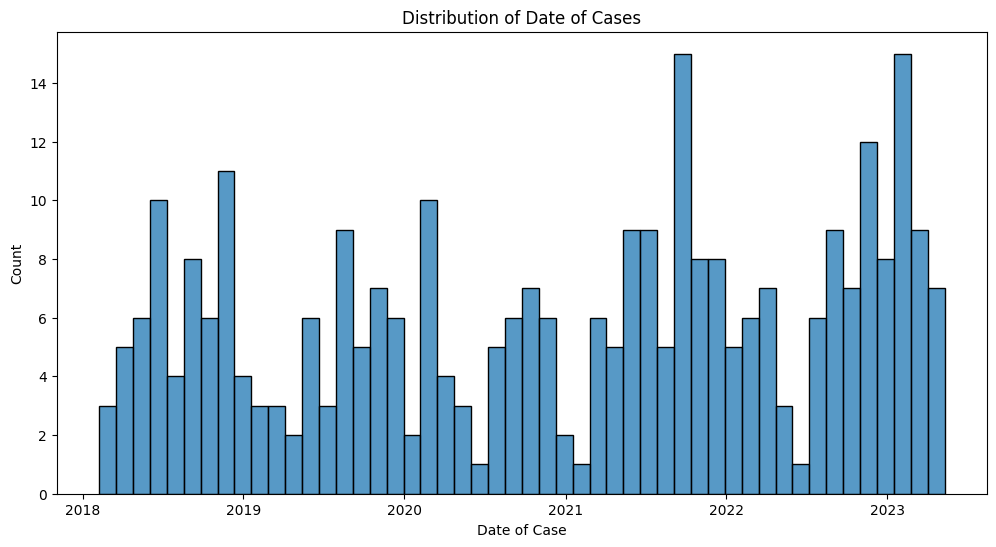

In [11]:
sns.histplot(df[column],bins=50)
plt.title(f"Distribution of Date of Cases")
plt.xlabel('Date of Case')
plt.show()

### Data of MRI Machines

We will analyse the distribution of the used MRI Machines. As they are setup the same they will not have a big influence in the classification.


In [12]:
column= 'ID_MRI_Machine'
print("Unique MRI Machines:", df[column].unique())
print("Missing values:", sum(df[column].isna()))

Unique MRI Machines: ['MRI1', 'MRI3', 'MRI4', 'MRI2', 'MRSZ']
Categories (5, object): ['MRI1', 'MRI2', 'MRI3', 'MRI4', 'MRSZ']
Missing values: 0


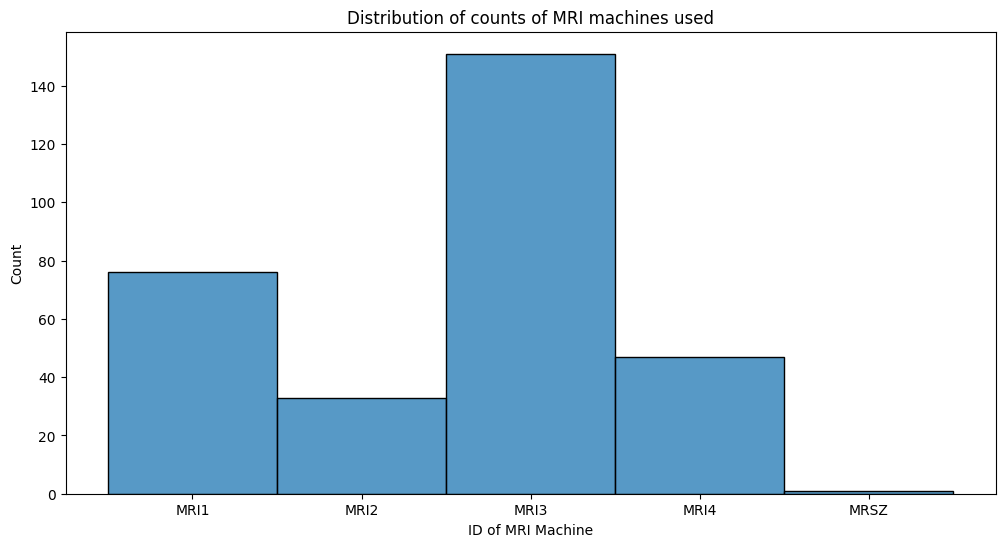

In [13]:
sns.histplot(df[column])
plt.title(f"Distribution of counts of MRI machines used")
plt.xlabel('ID of MRI Machine')
plt.show()

### Data Features (screening data)

#### Adenoma Size
The column for the 'Adenoma_size' describes if an Adenoma was labeled as micro or macro.
Micro is defined as <10mm and a macro is defined as >= 10 mm in size.

In [14]:
column= 'Adenoma_size'
print(f"Summary Statistics:\n{df[column].describe()}")
print(f"Percentage Distribution:\n{df[column].value_counts(normalize=True) * 100}")
print(f"Missing values Adenoma size:{sum(df[column].isna())}")

Summary Statistics:
count       297
unique        2
top       makro
freq        210
Name: Adenoma_size, dtype: object
Percentage Distribution:
Adenoma_size
makro    70.707071
mikro    29.292929
Name: proportion, dtype: float64
Missing values Adenoma size:11


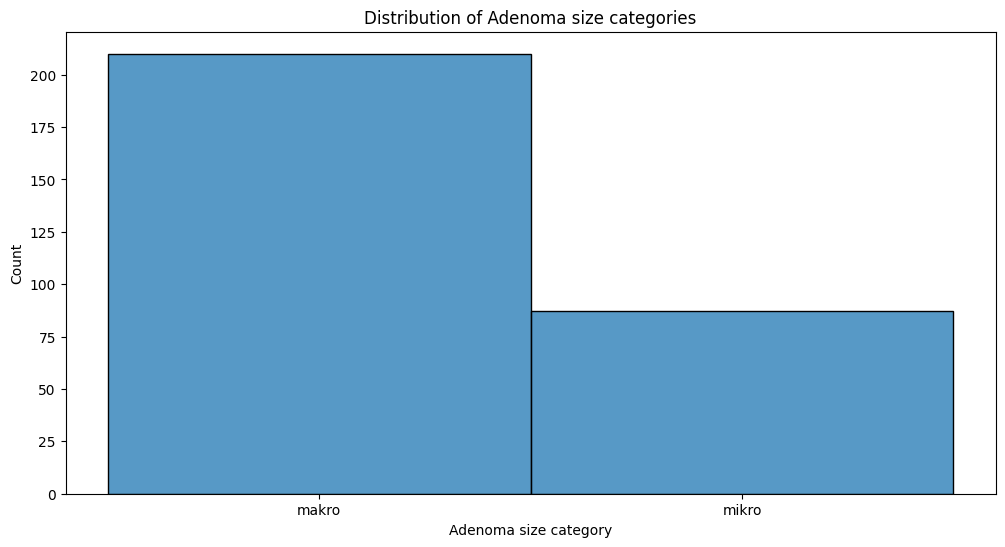

In [15]:
sns.histplot(df[column])
plt.title(f"Distribution of Adenoma size categories")
plt.xlabel('Adenoma size category')
plt.show()

#### Pre Operation hormonal disfunctions
The column for the 'Ausfälle prä' describes if a patient was experiencing an under- or an overproduction of a type of hormone (produced by the pituitary gland) before an operation.
Values which indicate a prolaktinoma are an overproduction of prolactin (hyperprolaktin).


In [16]:
# define all "pre op" columns
pre_op_columns = [col for col in df.columns if "Pre_" in col]

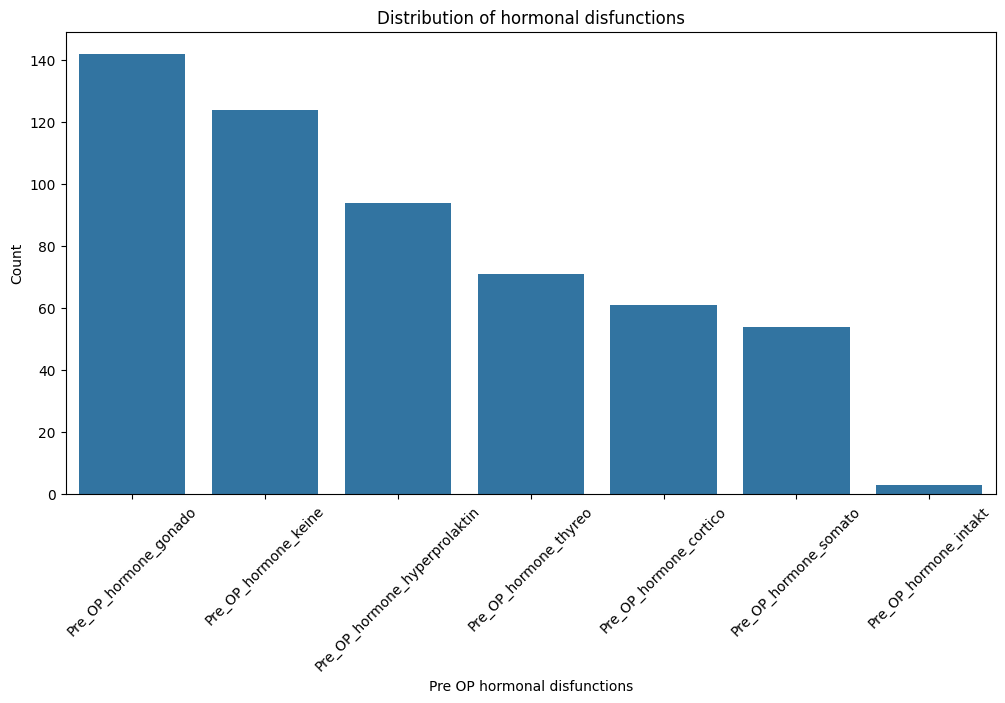

In [17]:
# summarise and sort the pre op column values
summary=df[pre_op_columns].sum().sort_values(ascending=False)
sns.barplot(x=summary.index, y=summary.values)
plt.title("Distribution of hormonal disfunctions")
plt.xlabel("Pre OP hormonal disfunctions")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

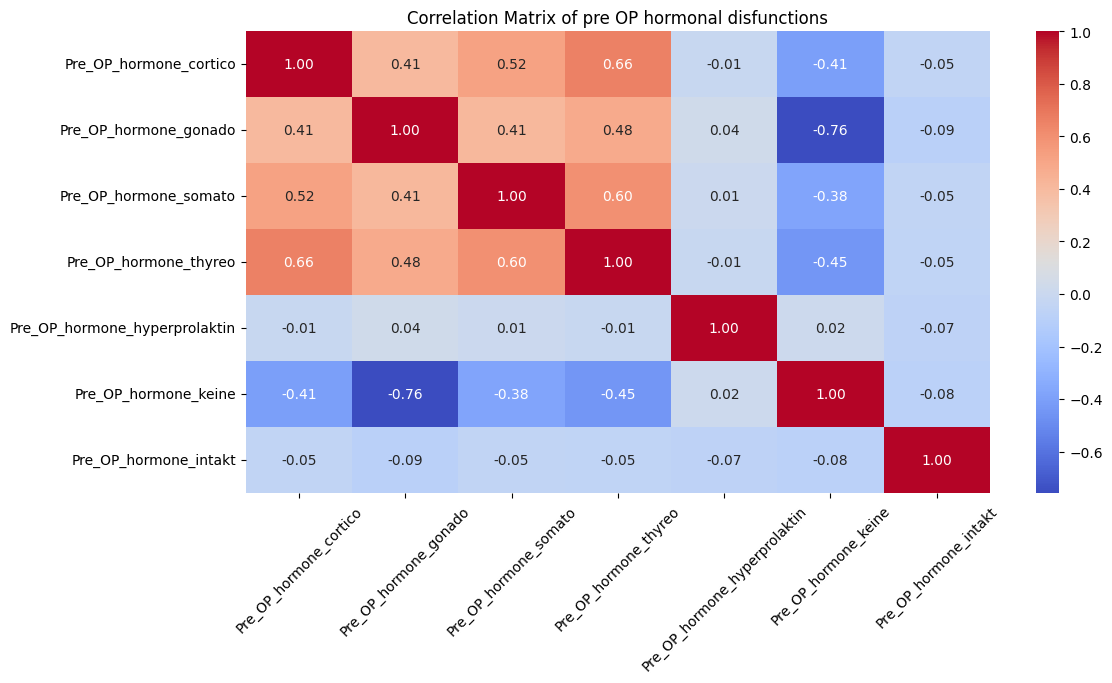

In [18]:
# correlate all pre op columns to each other
correlation_matrix = df[pre_op_columns].corr()
# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of pre OP hormonal disfunctions")
plt.xticks(rotation=45)
plt.show()

#### Data Label Quality
In the label data there is column with comments to the quality of the data used for the labeling. This includes if a decision to label was complicated, the decision is not confident or other data quality issues were found.



In [19]:
column= 'Label_Quality'
print("Summary Statistics Data Quality:\n", df[column].describe())
print("Missing values:", sum(df[column].isna()))

Summary Statistics Data Quality:
 count              24
unique             13
top       Rathkezyste
freq                9
Name: Label_Quality, dtype: object
Missing values: 284


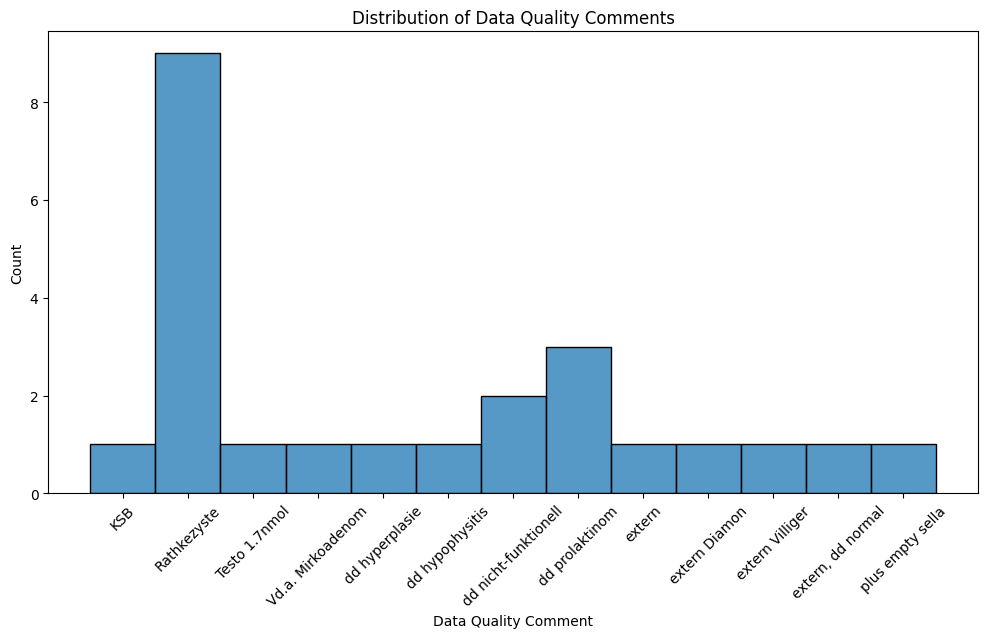

In [20]:
sns.histplot(df[column])
plt.title(f"Distribution of Data Quality Comments")
plt.xticks(rotation=45)
plt.xlabel('Data Quality Comment')
plt.show()

#### Date of Entry and Operation
The columns for the 'Eintrittsdatum' and 'Operationdatum' describe when a patient entered the hospital and also when the operation took place.
The difference between these values can show the significance or the extraordinary need for an operation.

In [21]:
column = 'Entry_date'
print("Range of Entry date:", df[column].min().strftime('%d.%m.%Y'), "to", df[column].max().strftime('%d.%m.%Y'))
print("Missing values:", sum(df[column].isna()))

Range of Entry date: 01.07.1994 to 01.09.2023
Missing values: 3


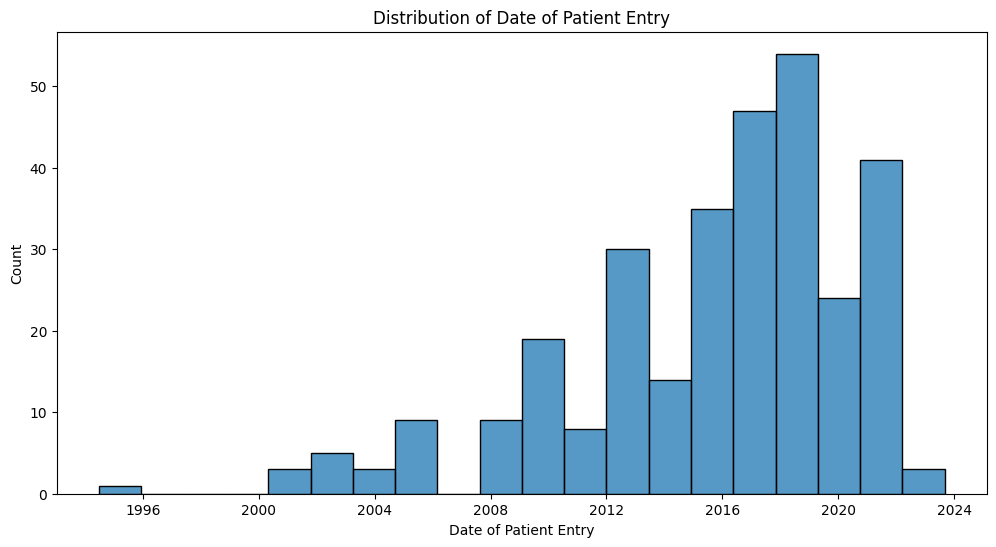

In [22]:
sns.histplot(df[column],bins=20)
plt.title(f"Distribution of Date of Patient Entry")
plt.xlabel('Date of Patient Entry')
plt.show()

In [23]:
column = 'Operation_date'
print("Range of Operation date:", df[column].min().strftime('%d.%m.%Y'), "to", df[column].max().strftime('%d.%m.%Y'))
print("Missing values:", sum(df[column].isna()))

Range of Operation date: 01.08.1994 to 14.09.2023
Missing values: 112


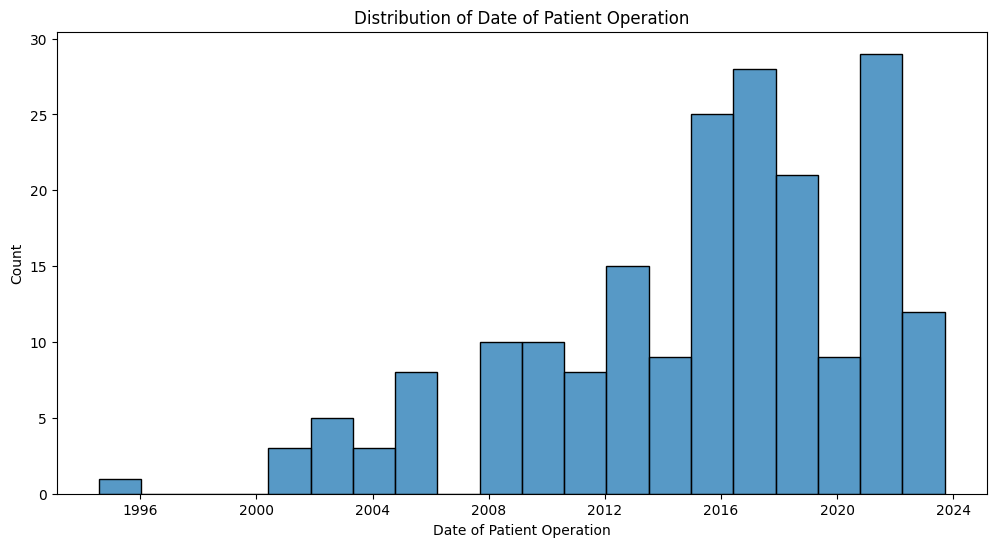

In [24]:
sns.histplot(df[column],bins=20)
plt.title(f"Distribution of Date of Patient Operation")
plt.xlabel('Date of Patient Operation')
plt.show()

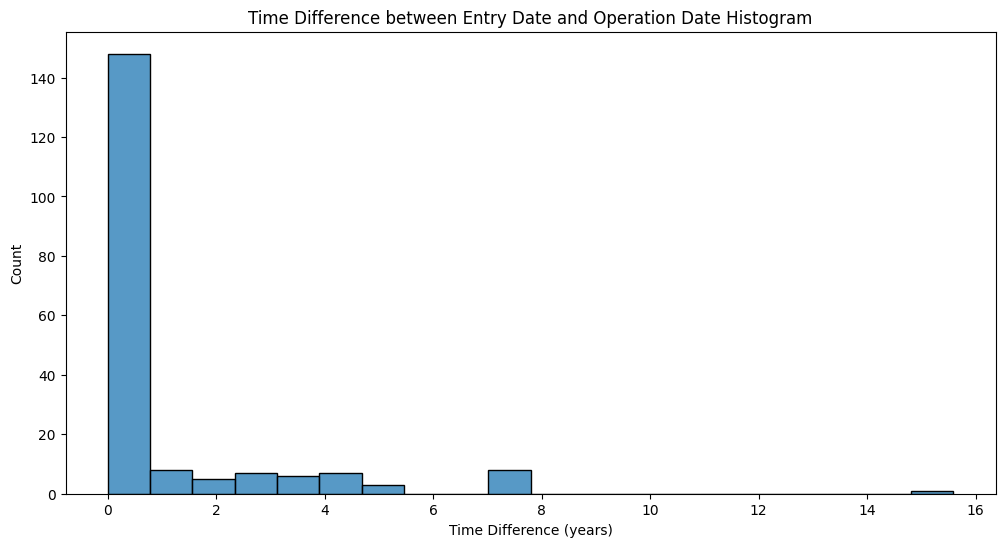

In [25]:
# calculate time difference in years between operation and entry date
df['EDDate_OPDate_Difference'] = (df['Operation_date'] - df['Entry_date']).dt.days /365
# Create a histogram to visualize the time differences
sns.histplot(df['EDDate_OPDate_Difference'], bins=20)
plt.title("Time Difference between Entry Date and Operation Date Histogram")
plt.xlabel("Time Difference (years)")
plt.ylabel("Count")
plt.show()

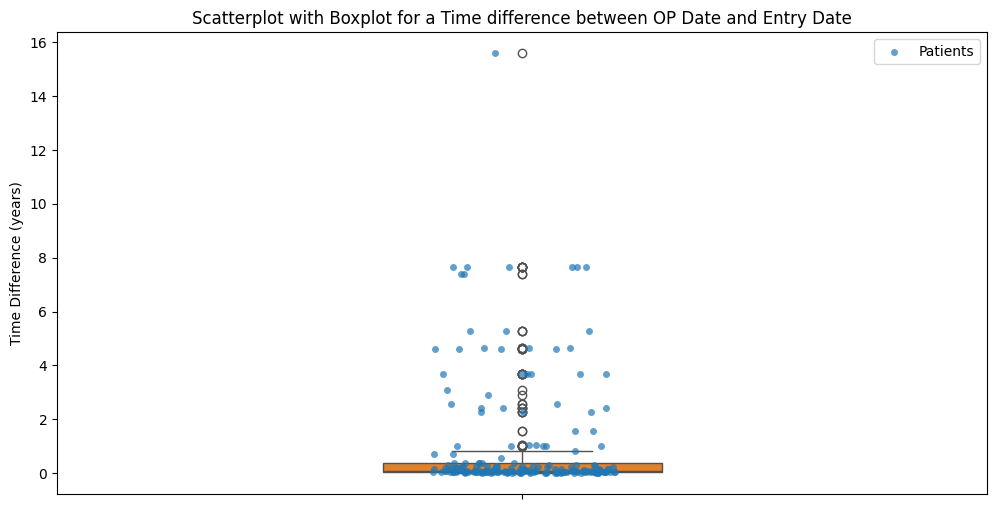

In [26]:
sns.stripplot(y=df['EDDate_OPDate_Difference'], jitter=True, legend=False,alpha=0.7,label="Patients")
sns.boxplot(y=df['EDDate_OPDate_Difference'], width=0.3)
plt.title("Scatterplot with Boxplot for a Time difference between OP Date and Entry Date")
plt.ylabel("Time Difference (years)")
plt.show()

#### Patient gender
The Patients gender is in the data set. It might be needed to impute certain missing values of hormone levels.

In [27]:
column = 'Patient_gender'
print("Summary Statistics Patient Gender:\n", df[column].describe())
print("Missing values:", sum(df[column].isna()))

Summary Statistics Patient Gender:
 count    308.000000
mean       0.214286
std        0.410994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Patient_gender, dtype: float64
Missing values: 0


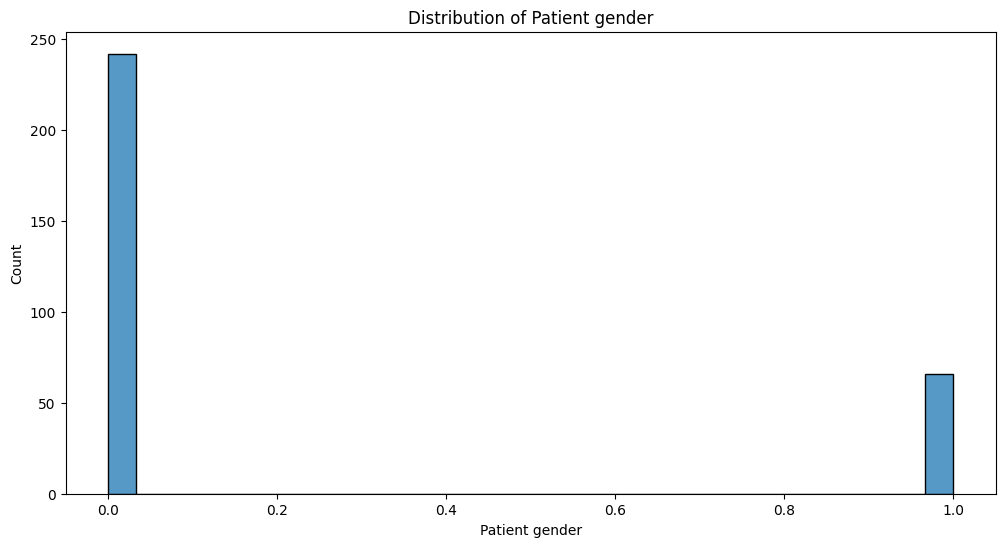

In [28]:
sns.histplot(df[column],bins=30)
plt.title(f"Distribution of Patient gender")
plt.xlabel('Patient gender')
plt.show()

#### Patient Age
The Patients age is also the data set. It might be needed to impute certain missing values of hormone levels.


In [29]:
column = 'Patient_age'
print("Range of ages:", df[column].min(), "to", df[column].max())
print("Mean Patient Age:", df[column].mean())
print("Median Patient Age:", df[column].median())
print("Missing values:", sum(df[column].isna()))

Range of ages: 17 to 86
Mean Patient Age: 56.5551948051948
Median Patient Age: 59.5
Missing values: 0


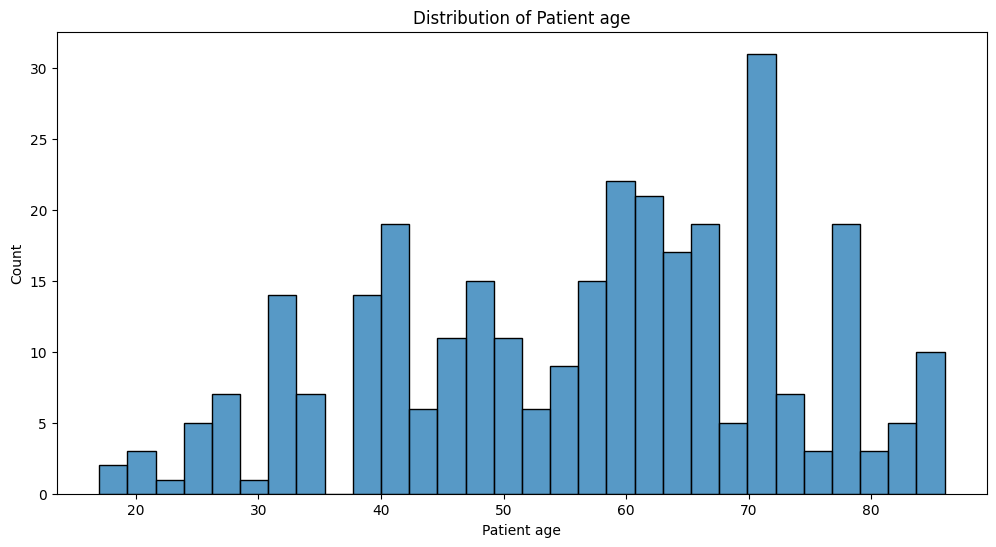

In [30]:
sns.histplot(df[column],bins=30)
plt.title(f"Distribution of Patient age")
plt.xlabel('Patient age')
plt.show()

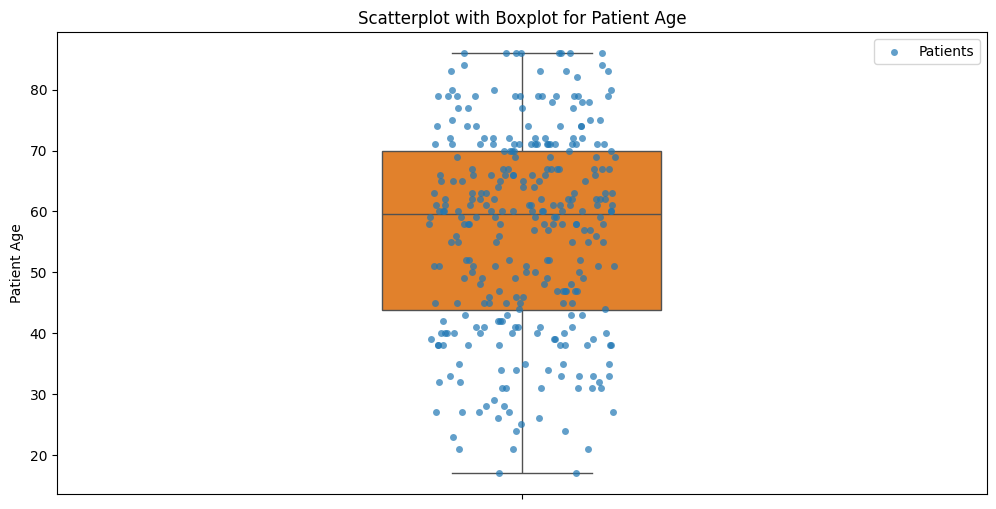

In [31]:
sns.stripplot(y=df[column], jitter=True, legend=False,alpha=0.7,label="Patients")
sns.boxplot(y=df[column], width=0.3)
plt.title("Scatterplot with Boxplot for Patient Age")
plt.ylabel("Patient Age")
plt.legend()
plt.show()

### Data Additional Laboratory Data (hormonal data)

Some Patients are missing lab values because they were transferred from external facilities like Kantonsspital Baden (KSB).
If the data was found by the labelers, we can include it in the models.

#### Prolactin (hormone)
The Column 'Prolactin' contains the measured values of prolactin for the patient.


In [32]:
column = 'PROL'
print("Range of Prolactin:", df[column].min(), "to", df[column].max())
print("Mean Prolactin:", df[column].mean())
print("Median Prolactin:", df[column].median())
print("Missing values:", sum(df[column].isna()))

Range of Prolactin: 1.5 to 1000.0
Mean Prolactin: 409.331125
Median Prolactin: 330.0
Missing values: 0


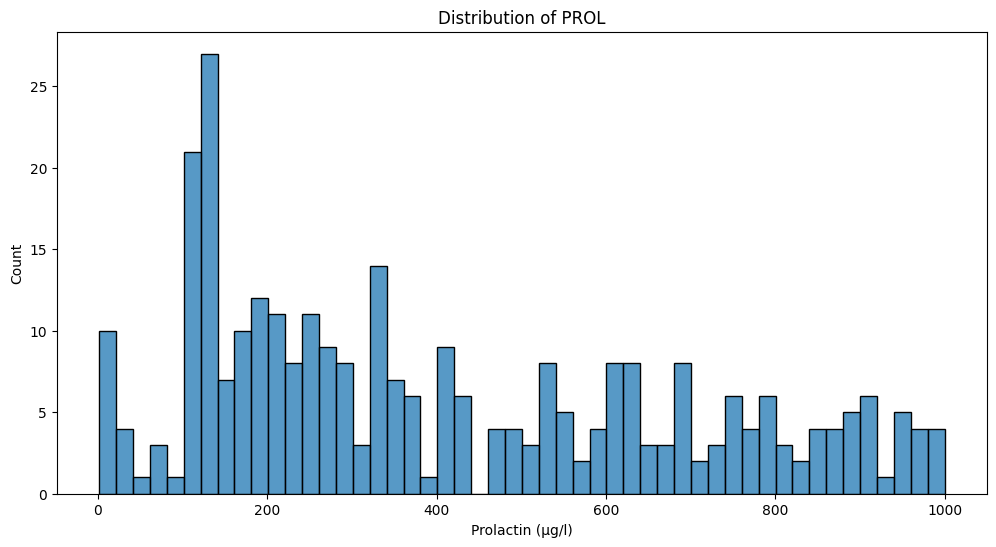

In [33]:
sns.histplot(df[column],bins=50)
plt.title(f"Distribution of {column}")
plt.xlabel('Prolactin (μg/l)')
plt.show()

#### Cortisol
The Column 'COR60' contains the measured values of Cortisol for the patient.


In [34]:
column = 'COR60'
print("Range of TSH:", df[column].min(), "to", df[column].max())
print("Mean TSH:", df[column].mean())
print("Median TSH:", df[column].median())
print("Missing values:", sum(df[column].isna()))

Range of TSH: 271.0 to 8360.0
Mean TSH: 803.0064935064935
Median TSH: 500.0
Missing values: 0


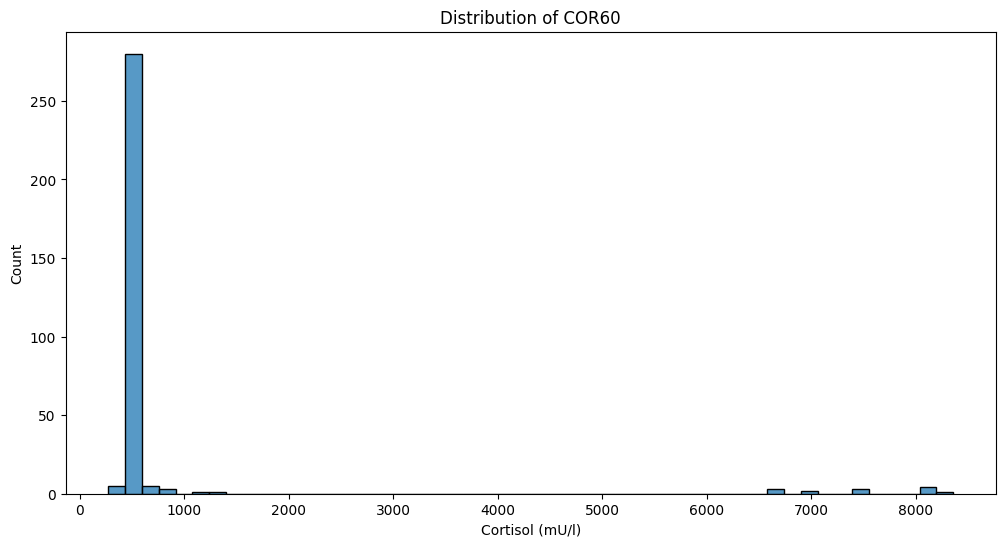

In [36]:
sns.histplot(df[column],bins=50)
plt.title(f"Distribution of {column}")
plt.xlabel('Cortisol (mU/l)')
plt.show()

#### IGF1 (hormone)
The Column 'IGF1' contains the measured values of Insulin-like growth factor 1 for the patient.


In [37]:
column = 'IGF1'
print("Range of IGF1:", df[column].min(), "to", df[column].max())
print("Mean IGF1:", df[column].mean())
print("Median IGF1:", df[column].median())
print("Missing values:", sum(df[column].isna()))

Range of IGF1: 6.3 to 989.0
Mean IGF1: 255.2666655844156
Median IGF1: 187.5
Missing values: 0


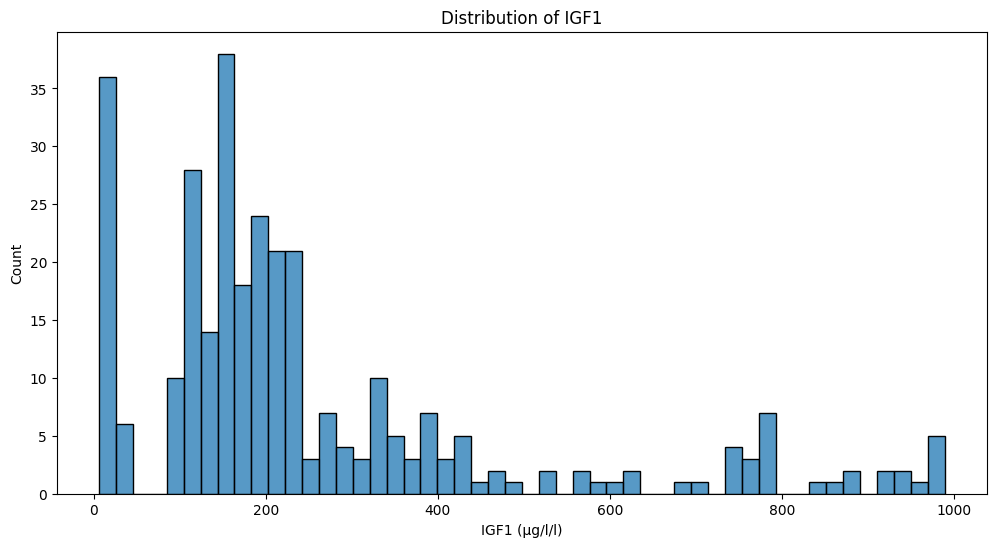

In [39]:
sns.histplot(df[column],bins=50)
plt.title(f"Distribution of {column}")
plt.xlabel('IGF1 (μg/l/l)')
plt.show()

#### FT4 (hormone)
The Column 'FT4' contains the measured values of Insulin-like growth factor 1 for the patient.


In [40]:
column = 'FT4'
print("Range of FT4:", df[column].min(), "to", df[column].max())
print("Mean FT4:", df[column].mean())
print("Median FT4:", df[column].median())
print("Missing values:", sum(df[column].isna()))

Range of FT4: 6.7 to 995.0
Mean FT4: 156.8541590909091
Median FT4: 126.5
Missing values: 0


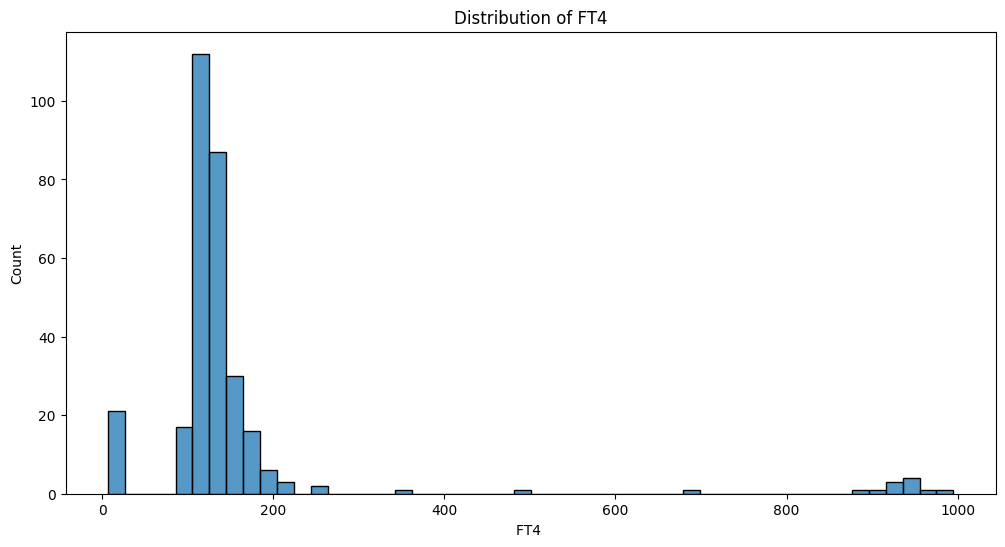

In [42]:
sns.histplot(df[column],bins=50)
plt.title(f"Distribution of {column}")
plt.xlabel('FT4 ')
plt.show()

#### Testosteron (hormone)
The Column 'Testosteron' contains the measured values of Insulin-like growth factor 1 for the patient.


In [43]:
column = 'TEST'
print("Range of TEST:", df[column].min(), "to", df[column].max())
print("Mean TEST:", df[column].mean())
print("Median TEST:", df[column].median())
print("Missing values:", sum(df[column].isna()))

Range of TEST: 0.7 to 995.0
Mean TEST: 161.98995610389613
Median TEST: 45.0
Missing values: 0


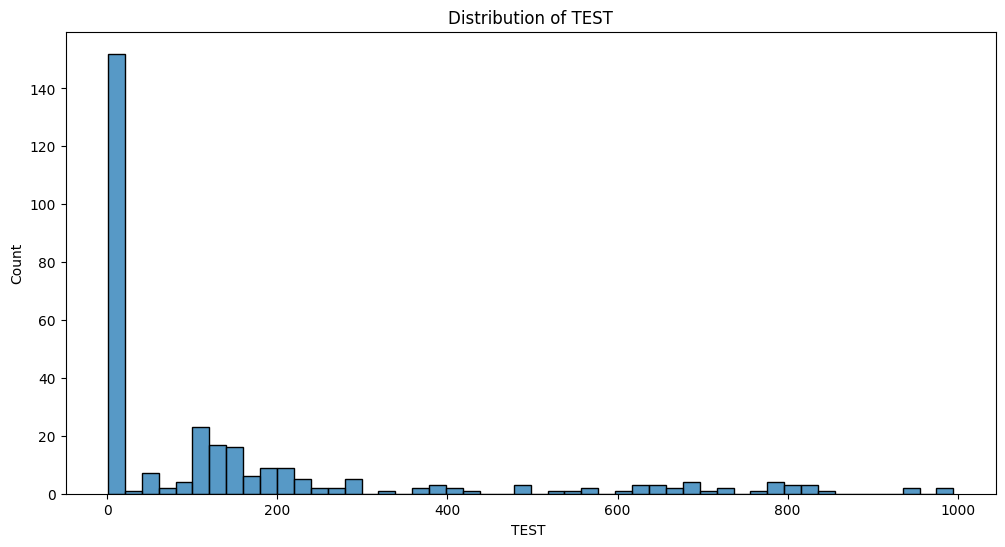

In [45]:
sns.histplot(df[column],bins=50)
plt.title(f"Distribution of {column}")
plt.xlabel('TEST ')
plt.show()

#### LH (hormone)
The Column 'LH' contains the measured values of Insulin-like growth factor 1 for the patient.


In [46]:
column = 'LH'
print("Range of LH:", df[column].min(), "to", df[column].max())
print("Mean LH:", df[column].mean())
print("Median LH:", df[column].median())
print("Missing values:", sum(df[column].isna()))

Range of LH: 15.4452 to 935.0
Mean LH: 215.1794180627706
Median LH: 150.0
Missing values: 0


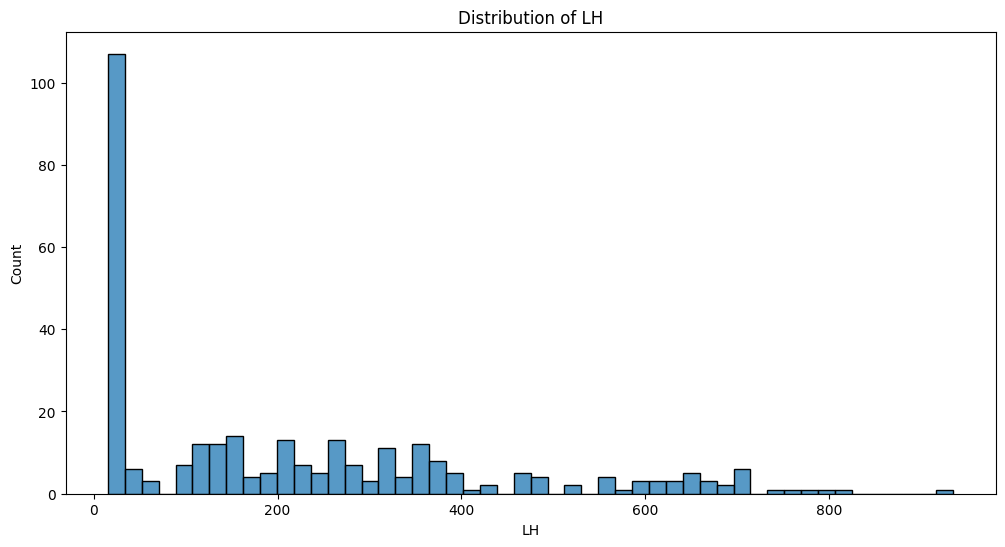

In [48]:
sns.histplot(df[column],bins=50)
plt.title(f"Distribution of {column}")
plt.xlabel('LH')
plt.show()

### Data Labels (Medical diagnosis data)

#### Category Prolactinoma (binary Label)
The Column 'Category' contains the actual label data if a adenoma is a prolactinoma or a non-prolactinoma.


In [49]:
column= 'Category'
print("Summary Statistics:\n",df[column].describe())
print("Percentage Distribution:\n",df[column].value_counts(normalize=True) * 100)
print("Missing values Adenoma category:", sum(df[column].isna()))

Summary Statistics:
 count                 308
unique                  2
top       non-prolaktinom
freq                  256
Name: Category, dtype: object
Percentage Distribution:
 Category
non-prolaktinom    83.116883
prolaktinom        16.883117
Name: proportion, dtype: float64
Missing values Adenoma category: 0


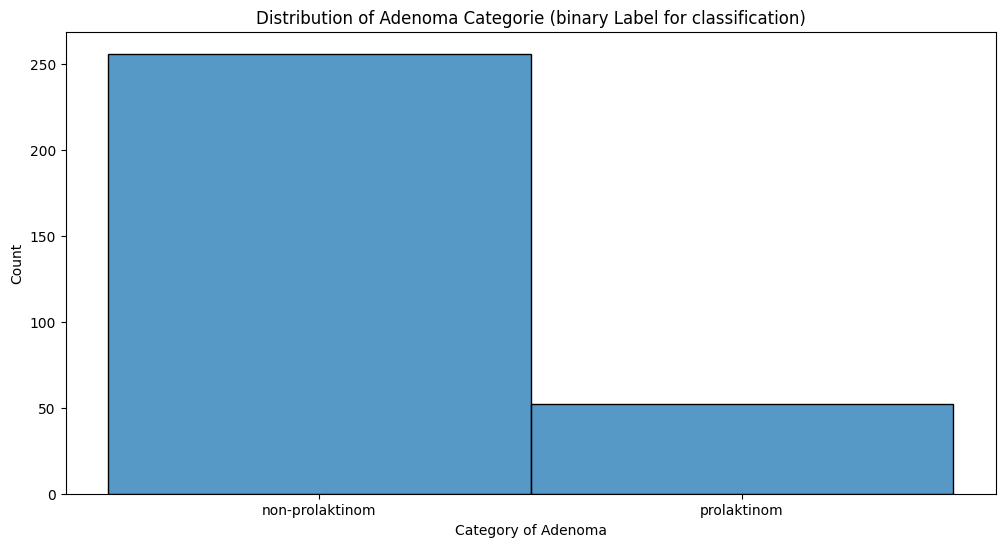

In [50]:
sns.histplot(df[column])
plt.title(f"Distribution of Adenoma Categorie (binary Label for classification)")
plt.xlabel('Category of Adenoma')
plt.show()

#### Diagnosis Prolactinoma (adenoma description)
The Column 'Diagnosis' contains the actual label data if a adenoma is a prolactinoma or a non-prolactinoma.


In [51]:
column= 'Diagnosis'
print("Summary Statistics:\n",df[column].describe())
print("Percentage Distribution:\n",df[column].value_counts(normalize=True) * 100)
print("Missing values Diagnosis:", sum(df[column].isna()))


Summary Statistics:
 count         308
unique         13
top       inaktiv
freq           96
Name: Diagnosis, dtype: object
Percentage Distribution:
 Diagnosis
inaktiv                                                                                                                     31.168831
inaktiv (gonado)                                                                                                            29.870130
prolaktinom                                                                                                                 14.610390
rathke                                                                                                                      10.064935
gh                                                                                                                           8.116883
inaktiv (acth)                                                                                                               1.948052
inaktiv, rathke                     

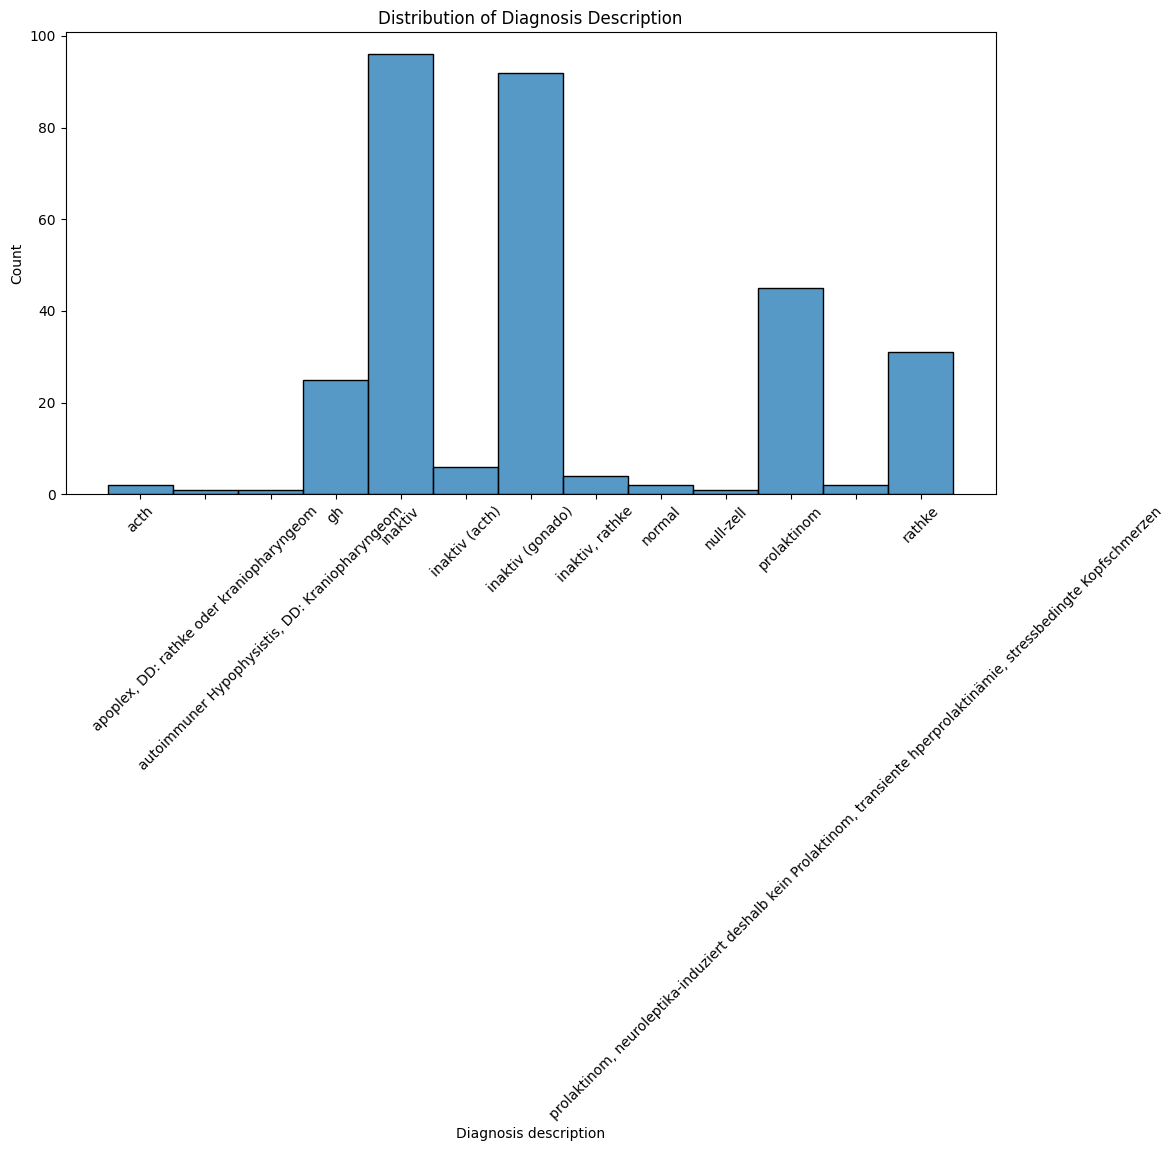

In [52]:
sns.histplot(df[column])
plt.title(f"Distribution of Diagnosis Description")
plt.xticks(rotation=45)
plt.xlabel('Diagnosis description')
plt.show()

##

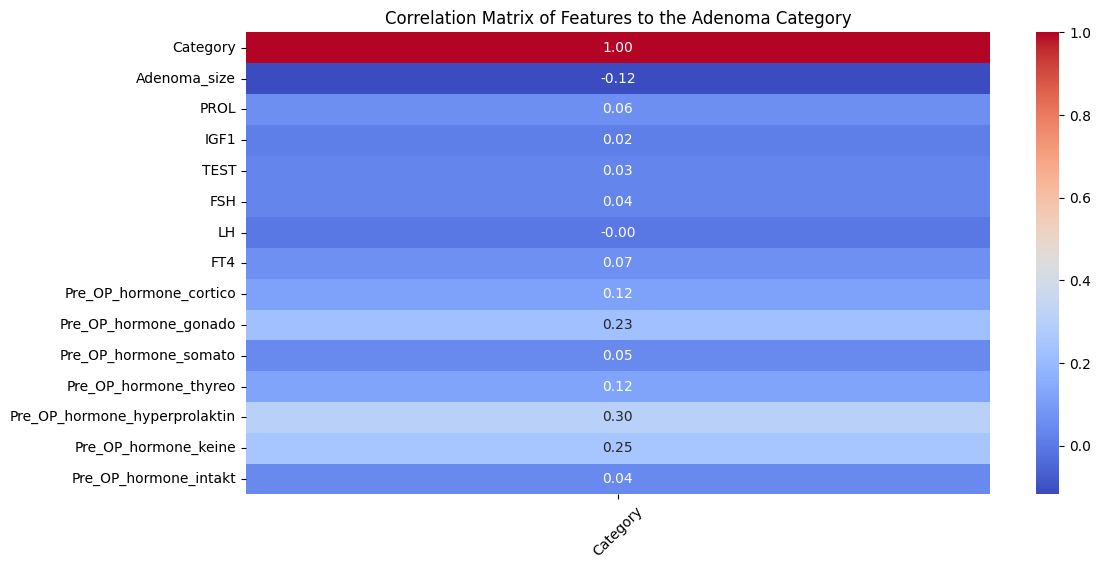

In [53]:
# factorise all features and then correlate them to each other
df_patients_corr = df[['Category','Adenoma_size','PROL', 'IGF1','TEST','FSH','LH','FT4']+pre_op_columns].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
correlation_matrix = df_patients_corr.iloc[:,0:1]

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features to the Adenoma Category")
plt.xticks(rotation=45)
plt.show()

## MRI per Patient

In [54]:
summary = df.groupby('Patient_ID')['Patient_ID'].count().sort_values(ascending=False)
#TODO: maybe more eda needed

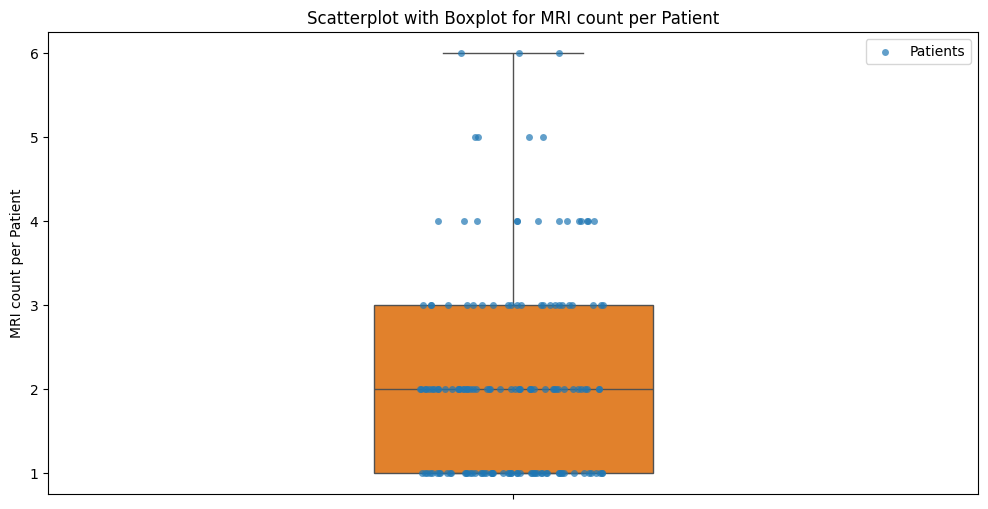

In [55]:
sns.stripplot(y=summary, jitter=True, legend=False,alpha=0.7,label="Patients")
sns.boxplot(y=summary, width=0.3)
plt.title("Scatterplot with Boxplot for MRI count per Patient")
plt.ylabel("MRI count per Patient")
plt.show()